<a href="https://colab.research.google.com/github/BrianGisemba/Hypothyroid-Prediction-/blob/main/Moringa_School_Core_Module_2_WK8_IP_Brian_Michira_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

## a)Specifying the QUestion

As Data Scientists working for Nairobi Women Hospital we are to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid or not. 

## b)Definnig the Metric for Success
Come up with a model that can accurately predict whether a patient has hypothyroid or not.

##c)Understanding the context
Hypothyroidism is a condition in which the thyroid gland does not produce enough of thyroid hormone.Hypothyroidism may not cause noticeable symptoms in the early stages but over time untreated hypothyroidism can cause a number of health problems such as obesity,joint pain,infertility and heart diseases.Anyne can develop hypothyroidisnm ,but you are at a high risk if you:

*   Are a woman.
*   Are older than 60 years.
*   Have a family history of thyroid disease.
*   Have an autoimmune disease, such as type 1 diabetes or celiac disease.
*   Have been treated with radioactive iodine or anti-thyroid medications.
*   Received radiation to your neck or upper chest.
*   Have had thyroid surgery.
*   Have been pregnant or delivered a baby within the past six months










## d)Recording the Experimental Design
1. Defining the Question
2. Loading and previewing the dataset
3. Data Cleaning
4. Performing EDA
5. Building Prediction Model
6. Evaluation of the solution
7. Challenging the solution 
8. Conclusion

# IMPORTING LIBRARIES

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

# LOADING AND PREVIEWING OUR DATASET

In [2]:
df=pd.read_csv("/content/hypothyroid.csv")
#previewing the top of the dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
#previewing the bottom of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
#checking the number of records
df.shape

(3163, 26)

3163 rows and 26 columns

In [5]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All the data types are objects

In [7]:
#list of columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [8]:
#viewing the unique values in our dataset
# Check for unique values in each column
for col in df.columns.to_list():
  print(f'{col} column unique values:\n')
  print(df[col].unique(), end='\n')
  print('\n')

status column unique values:

['hypothyroid' 'negative']


age column unique values:

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


sex column unique values:

['M' 'F' '?']


on_thyroxine column unique values:

['f' 't']


query_on_thyroxine column unique values:

['f' 't']


on_antithyroid_medication column unique values:

['f' 't']


thyroid_surgery column unique values:

['f' 't']


query_hypothyroid column unique values:

['f' 't']


query_hyperthyroid column unique values:

['f' 't']


pregnant column unique values:

['f' 't']


sick column unique values:

['f' 't']



There are missing values indicated by a "?"

# DATA CLEANING

In [9]:
#replacing "?" with null values 
df.replace(to_replace='?', inplace=True, value=np.NaN)

In [10]:
#checking missing values
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [11]:
#dropping the TBG column since it has a lot of missing values
df.drop('TBG',inplace=True,axis=1) 

In [12]:
#seeing if the column is dropped
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n


In [13]:
#converting the continous variables to numeric in oreder to input the missing values using mean
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col])

In [14]:
#viewing the data types
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
dtype: object

In [15]:
#dealing with null values by inputing the mean
df['FTI'].fillna(df['FTI'].mean(), inplace= True)
df['T4U'].fillna(df['T4U'].mean(), inplace= True)
df['TT4'].fillna(df['TT4'].mean(), inplace= True)
df['T3'].fillna(df['T3'].mean(), inplace= True)
df['TSH'].fillna(df['TSH'].mean(), inplace= True)
df['age'].fillna(df['age'].mean(), inplace=True)

In [16]:
df.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

# EXPLANATORY DATA ANALYSIS

## a)Univariate Analysis

In [19]:
#checking the statistcal summaries
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,51.211697,5.936136,1.933220,108.459968,0.984648,112.009437
std,18.042689,22.296031,0.868751,43.323004,0.210214,41.373266
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,37.250000,0.000000,1.500000,85.000000,0.870000,92.000000
50%,51.154214,1.000000,1.939749,106.000000,0.978199,109.000000
75%,65.000000,5.923180,2.200000,124.000000,1.050000,125.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,485.000000


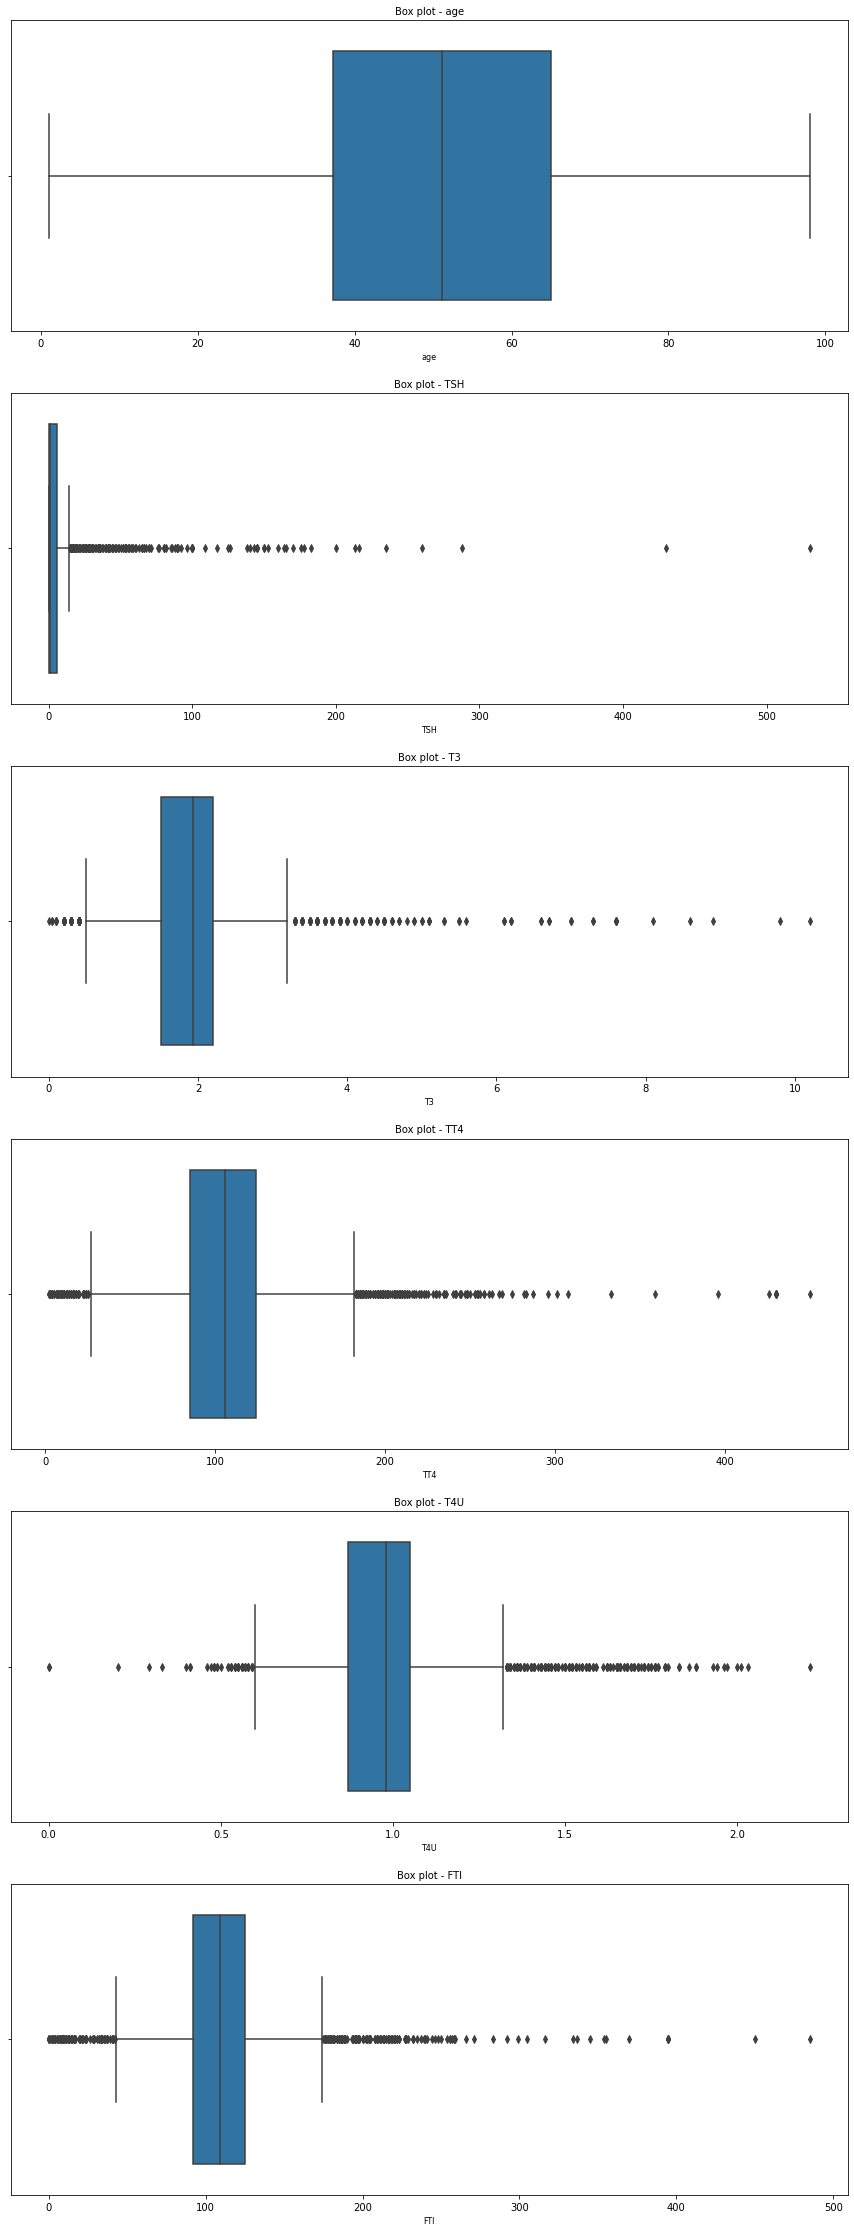

In [20]:
#We shall use the box plots to check for outliers
col_names=numerical_columns

fig, ax = plt.subplots(len(col_names), figsize=(15,40))

for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [21]:
# dealing with outliers
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df1.shape)

# Printing the shape of our old dataset
print(df.shape)

(2392, 25)
(3090, 25)


In [22]:
#Measure of Central Tendancies
#mean
col_names = numerical_columns
for i, col_val in enumerate(col_names):
  print('The mean of ' + str(col_val) + ' is ' + str(df[col_val].mean()))

The mean of age is 51.21169693872839
The mean of TSH is 5.936135942744259
The mean of T3 is 1.9332195533246168
The mean of TT4 is 108.45996763754039
The mean of T4U is 0.9846480096809735
The mean of FTI is 112.00943707521557


In [23]:
#mean
col_names = numerical_columns
for i, col_val in enumerate(col_names):
  print('The mode of ' + str(col_val) + ' is ' + str(df[col_val].mode()))

The mode of age is 0    51.154214
dtype: float64
The mode of TSH is 0    0.0
dtype: float64
The mode of T3 is 0    1.939749
dtype: float64
The mode of TT4 is 0    108.85
dtype: float64
The mode of T4U is 0    0.978199
dtype: float64
The mode of FTI is 0    115.397771
dtype: float64


In [24]:
#Measure odf Dispersion
#standard deviation
for i, col_val in enumerate(col_names):
  print('The standard deviation of ' + str(col_val) + ' is ' + str(df[col_val].std()))

The standard deviation of age is 18.04268880268729
The standard deviation of TSH is 22.296030512574372
The standard deviation of T3 is 0.8687507136890131
The standard deviation of TT4 is 43.32300356330104
The standard deviation of T4U is 0.2102135003430771
The standard deviation of FTI is 41.37326613262737


In [25]:
#skewness
for i, col_val in enumerate(col_names):
  print('The skewness of ' + str(col_val) + ' is ' + str(df[col_val].skew()))

The skewness of age is -0.17645204646611629
The skewness of TSH is 10.97794411451603
The skewness of T3 is 2.3575611614053216
The skewness of TT4 is 1.597642114897916
The skewness of T4U is 1.268085622522651
The skewness of FTI is 1.584457465837231


There is a negative skewness in the age variable showing that most of the patients are below the age of 51.

The other variables have are positivly skewed meaning most of the values appear on the right side i.e greater than the mean.

In [26]:
#kurtosis
for i, col_val in enumerate(col_names):
  print('The kurtosis of ' + str(col_val) + ' is ' + str(df[col_val].kurt()))

The kurtosis of age is -0.6668215147911516
The kurtosis of TSH is 176.59457532808548
The kurtosis of T3 is 13.896978082125337
The kurtosis of TT4 is 8.225073933620983
The kurtosis of T4U is 4.127086247315943
The kurtosis of FTI is 9.47021880520494


TSH has a high Kurtosis-leptokurtic showing presence of outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda1f6c3190>,
      dtype=object)

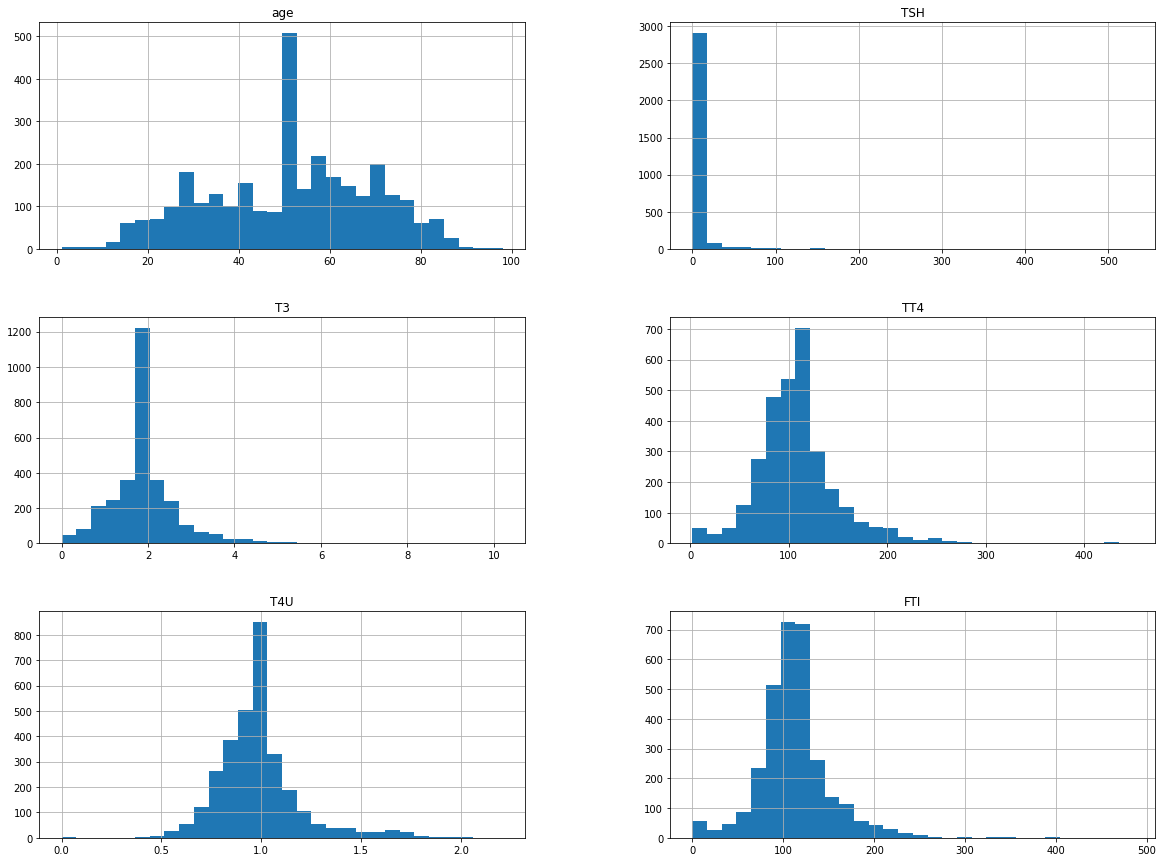

In [27]:
# Visualize the distribution of each column
df.hist(bins=30, figsize=(20, 15))

Most of the variables are normally distibuted-form a bell curve apart from TSH.

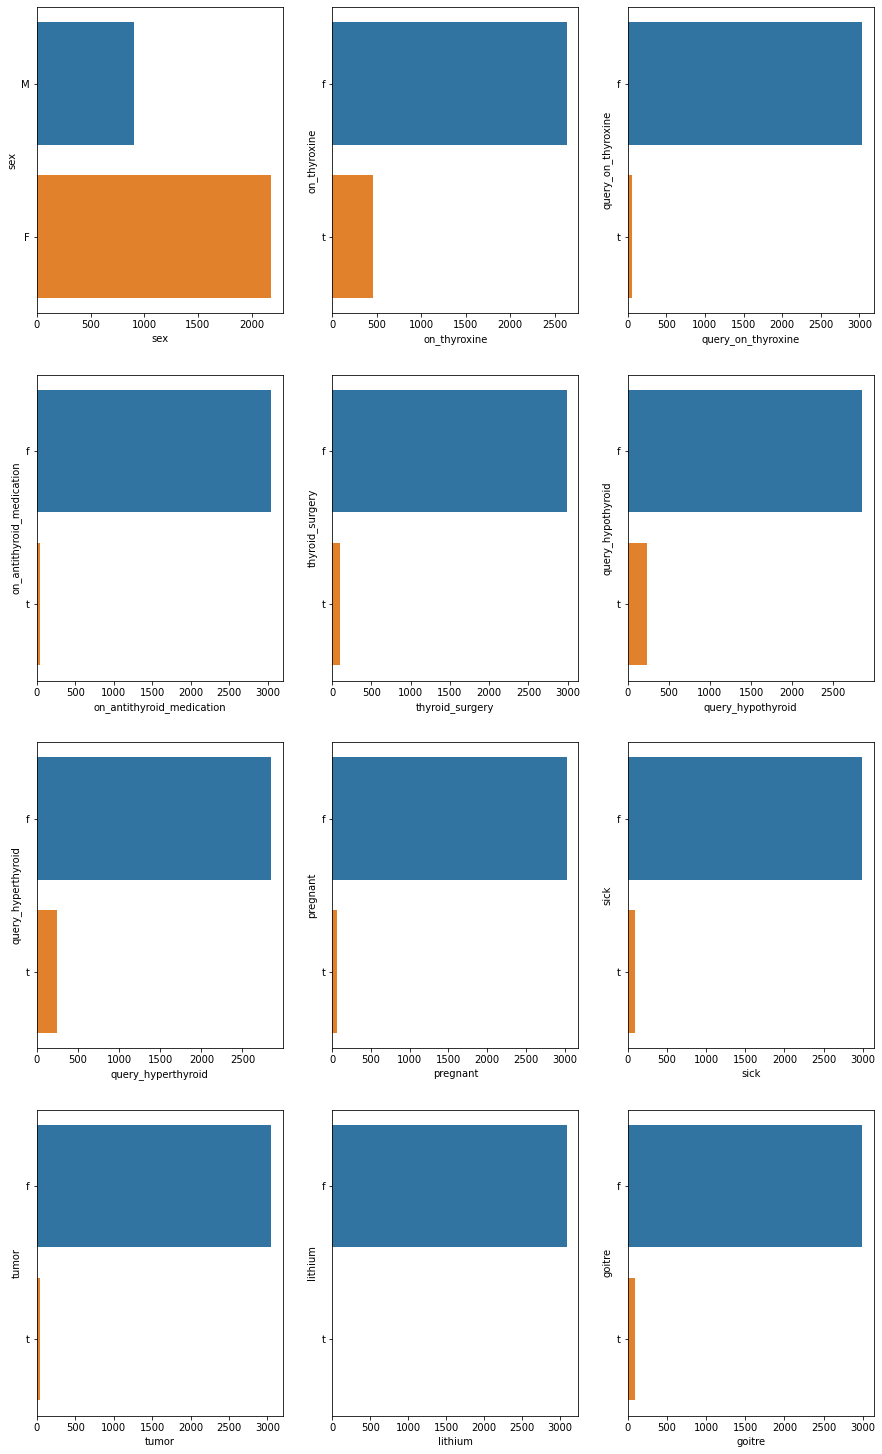

In [28]:
#univariate analysis categorical variables
columns=['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
         'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
          'sick','tumor', 'lithium', 'goitre']
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for col in columns:
  ax=plt.subplot(12,3,plotnumber)
  sns.countplot(y=col,data=df)
  plt.xlabel(col)
  plt.ylabel(col)
  plotnumber+=1
plt.show()

Most patients were Females.

Most patients were not on Thyroxine.

Most patients had no query on Thyroxine.

Most patients were not on antithyroid medication.

Most patients had not undergone thyroid surgery.

Most patients had no query on hypothyroid.

Most patients had no quer on hyperthyroid.

Most patients were not pregnant.

Most patients were not sick.

Most patients had no turmor.

Most patients had no lithium .

Most patients had no goitre.


**Univariate Analysis Conclusion**:The data given is Imbalanced.

## b)Bivariate Analysis

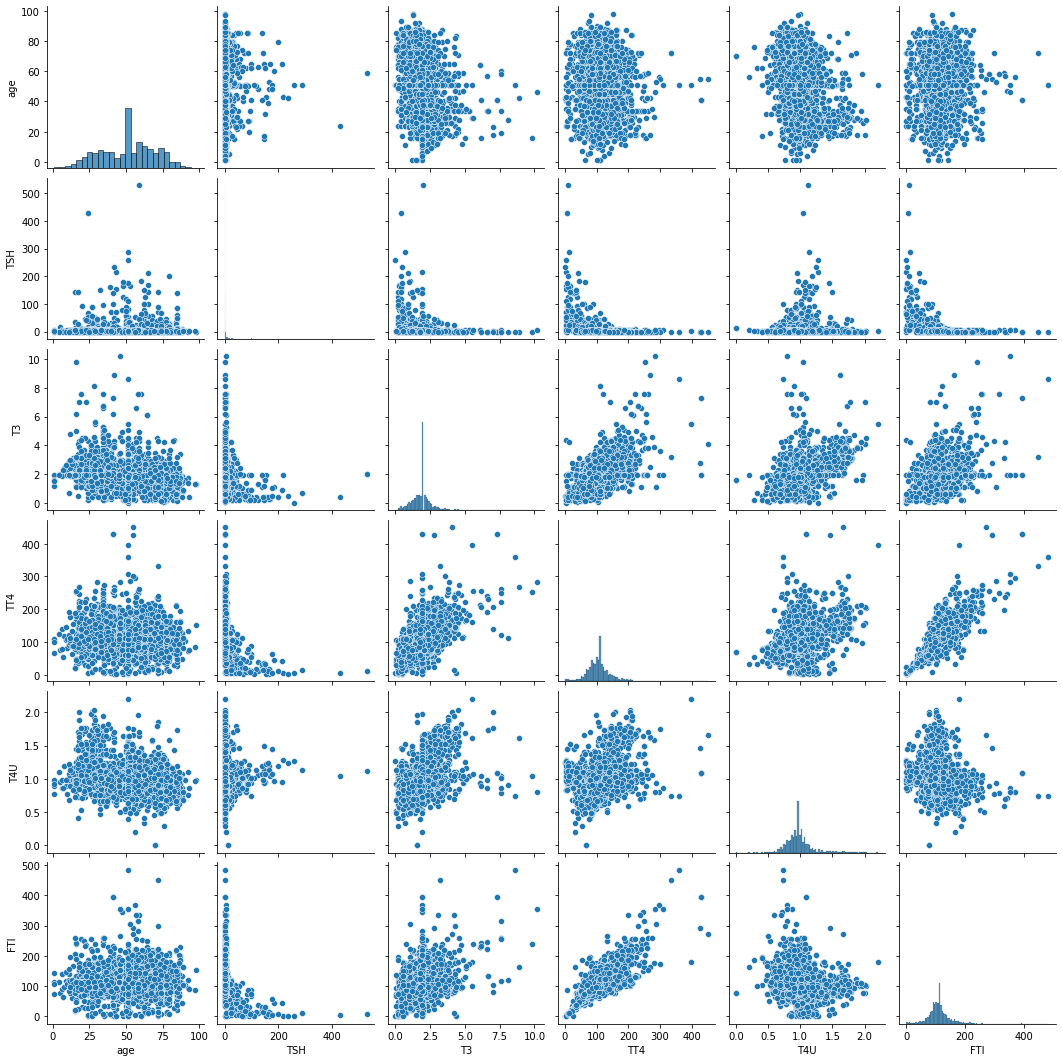

In [29]:
#plotting Bivariate summaries
sns.pairplot(df)
plt.show()

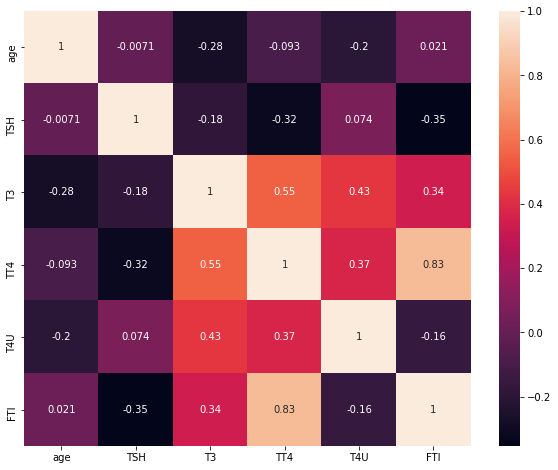

In [30]:
# Lets understand the correlations of each parament using heatmaps
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

There is a positive strong correlation between TT4 and FTI and betweeen T3 and TT4.

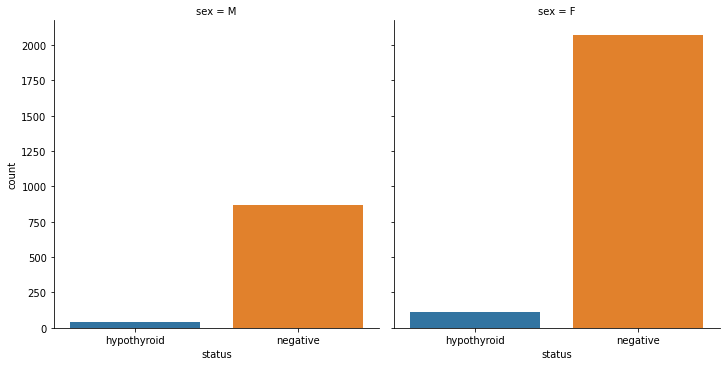

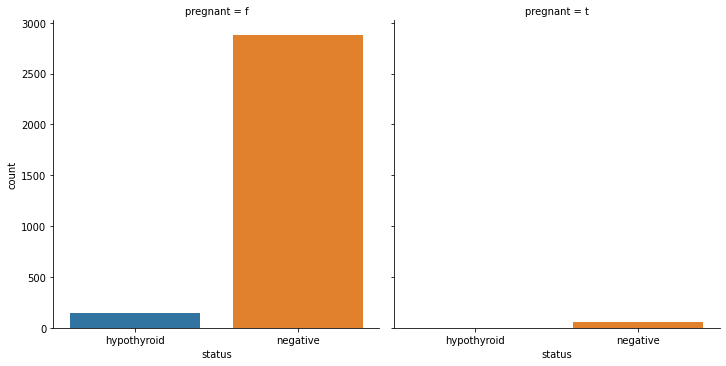

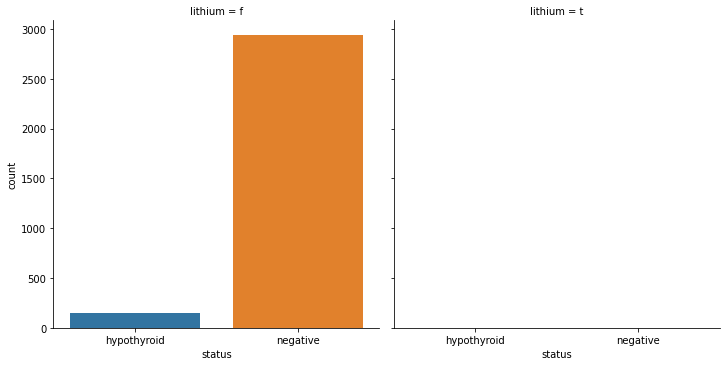

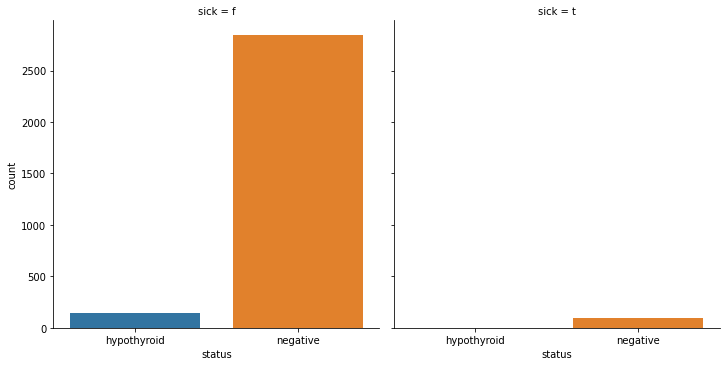

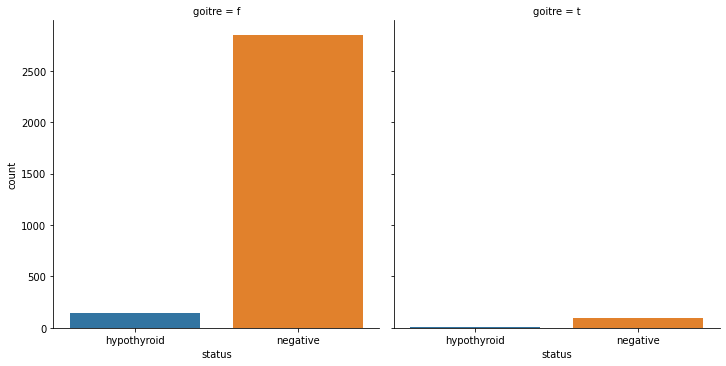

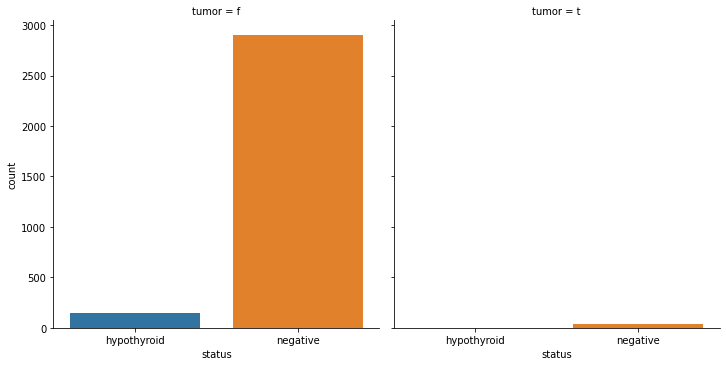

In [31]:
columns=['sex','pregnant','lithium','sick','goitre','tumor']
for col in columns:
  sns.catplot(x='status',col=col,kind='count',data=df)
plt.show()

There is imbalance in the class varibale 'status'.The patients who tested negative are more when comparing with different variables.

## c)Multivariate Analysis

In [32]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [33]:
#converting categorical values to numeric
from sklearn.preprocessing import LabelEncoder
cols=['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured','TT4_measured',
       'T4U_measured', 'FTI_measured','TBG_measured']
for name in cols:
  labelencoder = LabelEncoder()
  
  labelencoder.fit(df1[name])
  df[name] = labelencoder.transform(df[name])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3090 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3090 non-null   object 
 1   age                        3090 non-null   float64
 2   sex                        3090 non-null   int64  
 3   on_thyroxine               3090 non-null   int64  
 4   query_on_thyroxine         3090 non-null   int64  
 5   on_antithyroid_medication  3090 non-null   int64  
 6   thyroid_surgery            3090 non-null   int64  
 7   query_hypothyroid          3090 non-null   int64  
 8   query_hyperthyroid         3090 non-null   int64  
 9   pregnant                   3090 non-null   int64  
 10  sick                       3090 non-null   int64  
 11  tumor                      3090 non-null   int64  
 12  lithium                    3090 non-null   int64  
 13  goitre                     3090 non-null   int64

In [34]:
# we shall perform LDA on the dependet variables to determine their coeffiecients
#Selecting X and y
X=df.drop('status', axis=1)
y=df.status

In [35]:
#Perorming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()

X_lda=lda.fit(X,y)
#Getting the coeffients
X_lda.coef_

array([[-1.11034576e-02,  2.57648583e-01, -2.94563414e-01,
         7.15866964e-01,  1.08377111e+00, -1.06914239e+00,
        -7.30274440e-03, -9.79248163e-01,  1.04700557e+00,
         1.11927975e+00,  1.20960502e+00,  3.68889873e+00,
        -1.19818023e+00, -1.79020380e+00, -1.72255246e-01,
        -2.98753772e-02,  6.30660279e-02, -7.77631713e-01,
         5.76924653e-02,  1.95707517e+00, -6.30830053e+00,
        -7.92867657e+00, -4.99904926e-03, -6.45330056e+00]])

In [36]:
# creating a dataframe to visulize the coeffiecient
results=pd.DataFrame(index=X.columns.values,data=X_lda.coef_[0])
results.sort_values(0,ascending=False)

,0
lithium,3.688899
T4U_measured,1.957075
tumor,1.209605
sick,1.119280
on_antithyroid_medication,1.083771
pregnant,1.047006
query_on_thyroxine,0.715867
sex,0.257649
T3,0.063066
TT4,0.057692


The coefficients with positive values have more weight in determining the status of the patient.

# MODELLING

##a)Random Forest

In [37]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
y = df['status'].values
y= np.where(df['status']=='hypothyroid',0,1)
test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']

X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [39]:
# Create a Random Forest classifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)

# Train it on our training set.
tree = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9838187702265372


The model fits our data well with an accuracy of 98.38%.The model has a high accuracy due to class imbalance in the data.

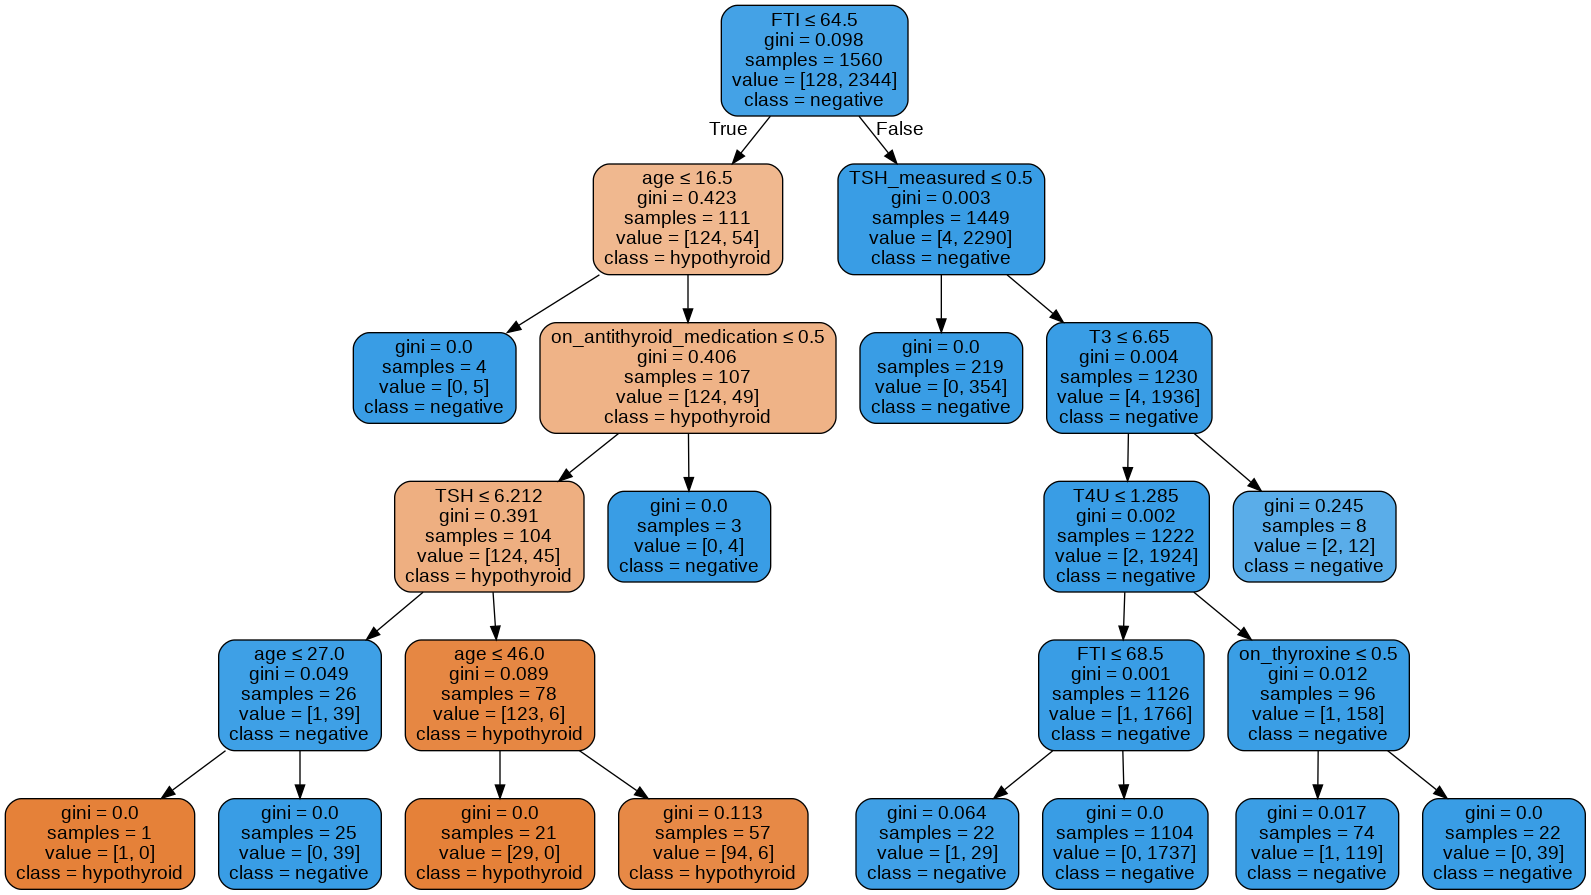

In [40]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [41]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

#Connecting each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sorting the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.03), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.23), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.71), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.23
Variable: age                  Importance: 0.03
Variable: on_antithyroid_medication Importance: 0.02
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant       

The important features in the Random Forest Classifier are FTI,TSH,age and on_antithyroid_medication.Below is the visual representation of the important features.

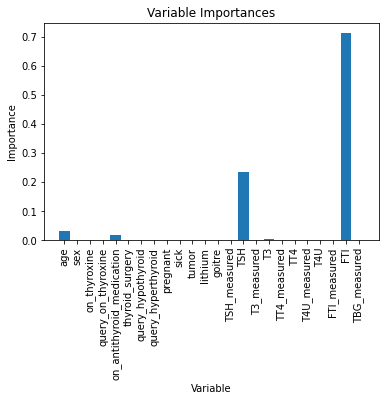

In [42]:
#visual representation
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


We go ahead and use th Ada Bossting technique to see if the is any change in the accuracy of the model.

## b)Ada Boosting Technique

In [43]:
from sklearn.ensemble import AdaBoostClassifier

# Fitting the model
ada_boost = AdaBoostClassifier(n_estimators=300,random_state=45)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Accuracy: 0.9935275080906149


The accuracy of the model increased to 99.35% which indicates over-fitting.

In [44]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# Connecting each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) 
print()

# Sorting the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.03), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.23), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.71), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.23
Variable: age                  Importance: 0.03
Variable: on_antithyroid_medication Importance: 0.02
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant       

The important features when we used Ada Boosting technique are;FTI,TSH,age and on_antithyroid_medication.The visual representation is shown below.

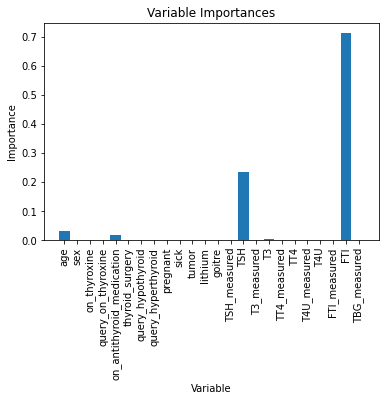

In [45]:
#visual representation
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Conducting hyperparameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV
#Creating a grid of hyperparameters
grid_params = { 'n_estimators': [100,200,300]}
#Building a 3 fold CV GridSearchCV object
grid = GridSearchCV(AdaBoostClassifier(), param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)
#Fitting the grid to the training data
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [47]:
#obtaining the tuned parameters
grid.best_params_

{'n_estimators': 100}

In [48]:
#Output confusion matrix and classification report of Gradient Boosting algorithm on validation set
from sklearn.metrics import classification_report, confusion_matrix
adab = AdaBoostClassifier(n_estimators=100)
adab.fit(X_train, y_train)
y_pred_ada = adab.predict(X_test)

print("Accuracy for the Gradient Boosting:",metrics.accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix for Gradient boosting:")
print(confusion_matrix(y_test,y_pred_ada))
print()
print("Classification Report for Gradient Boosting")
print(classification_report(y_test, y_pred_ada))

Accuracy for the Gradient Boosting: 0.988673139158576
Confusion Matrix for Gradient boosting:
[[ 21   5]
 [  2 590]]

Classification Report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.99      1.00      0.99       592

    accuracy                           0.99       618
   macro avg       0.95      0.90      0.93       618
weighted avg       0.99      0.99      0.99       618



A lower accuracy than the one which had no tuned parameters.High accuracy is due to class imbalance which can be seen clearly in the confusion matrix. 

## c)Gradient Boosting Technique

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
#implementing gradient boosting classifer by using differnt learning rates to view the accuracy when applying different learning rstes.
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=300, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)

    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()



Learning rate:  0.05
Accuracy score (training): 0.994
Accuracy score (validation): 0.992

Learning rate:  0.1
Accuracy score (training): 0.997
Accuracy score (validation): 0.990

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.990

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.994

Learning rate:  0.75
Accuracy score (training): 0.708
Accuracy score (validation): 0.728

Learning rate:  1
Accuracy score (training): 0.277
Accuracy score (validation): 0.290



We noted that the accuracy of the model reduced whenthe learning rate was greater than 0.5 and overfitting was observed when the learning rate was equal to 0.25 and 0.5 where the accuracy of the model was 100%.

Conducting hyper parameter tunig to determine the best parameters.

In [50]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
#parameter grid
LR={'learning_rate':[0.05, 0.1, 0.25, 0.5, 0.75, 1],'n_estimators':[100,150,200,250,300]}
tuning=GridSearchCV(GradientBoostingClassifier(),param_grid=LR,scoring='r2')
#fitting the model on the trainning set
tuning.fit(X_train,y_train)
#Getting the Best parameters 
print(tuning.best_params_)
print(tuning.best_score_)

{'learning_rate': 0.1, 'n_estimators': 300}
0.8291496771461839


In [51]:
#Output confusion matrix and classification report of Gradient Boosting algorithm on validation set
from sklearn.metrics import classification_report, confusion_matrix
gb = GradientBoostingClassifier(n_estimators=150,learning_rate = 0.05)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Accuracy for the Gradient Boosting:",metrics.accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix for Gradient boosting:")
print(confusion_matrix(y_test,y_pred_gb))
print()
print("Classification Report for Gradient Boosting")
print(classification_report(y_test, y_pred_gb))

Accuracy for the Gradient Boosting: 0.9919093851132686
Confusion Matrix for Gradient boosting:
[[ 23   3]
 [  2 590]]

Classification Report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.99      1.00      1.00       592

    accuracy                           0.99       618
   macro avg       0.96      0.94      0.95       618
weighted avg       0.99      0.99      0.99       618



After applying the best parameters we got an accuracy of 99.2%.There was a high accuracy due to class in balance.From the confusion matrix we can observe the class imbalance where True Negative is far more greater than the True Positive predictions.

In [52]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.03), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.23), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.71), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.71
Variable: TSH                  Importance: 0.23
Variable: age                  Importance: 0.03
Variable: on_antithyroid_medication Importance: 0.02
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant       

The important features when we used AGradient Boosting technique are;FTI,TSH,age and on_antithyroid_medication.The visual representation is shown below.

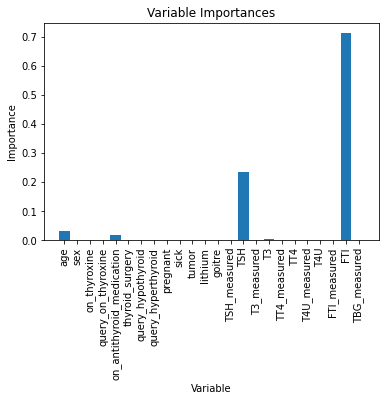

In [53]:
#visual representation
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# SVM

In [67]:
#Split the independent and dependent variables
y = df['status']

#using two features FTI and TSH which are the most important forest when using decision tress
X=df[['FTI','TSH']]



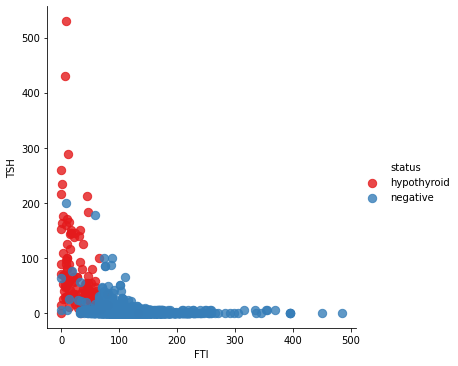

In [69]:
# Plott the two features
sns.lmplot(x='FTI', y= 'TSH', data=df, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.show()

In [ ]:
y= np.where(df['status']=='hypothyroid',0,1)

In [55]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

 ## a)Polynomial Function

In [56]:
from sklearn.svm import SVC
# Creating the polynomial kernel
# Fit the model
poly = SVC(kernel= 'poly',degree=3,gamma='scale')
poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
# Making predictions for our test dataset
y_pred_poly = poly.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
# Model Evaluation
print(f'The accuracy score is: {accuracy_score(y_test, y_pred_poly)}')

print(confusion_matrix(y_test, y_pred_poly))

The accuracy score is: 0.9816612729234089
[[ 35   7]
 [ 10 875]]


When using the polynomial function the accuracy is 98.2%.

## b)RBF

In [59]:
# Creating the rbf kernel
# Fit the model
rbf = SVC(kernel= 'rbf')
#training the model usinging the training set
rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
# Making predictions for our test dataset
y_pred_rbf = rbf.predict(X_test)

In [61]:
# Mode Evaluation
print(f'The accuracy score is: {accuracy_score(y_test, y_pred_rbf)}')

print(confusion_matrix(y_test, y_pred_rbf))

The accuracy score is: 0.9881337648327939
[[ 32  10]
 [  1 884]]


When using the rbf the Accuracy is 98.8%.

## c)Hyperparameter tuning

In [62]:
# defining parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV

#conducting the grid search
grid = GridSearchCV(SVC(), param_grid, refit = True)
#Fit the model for grid search
grid.fit(X_train, y_train)
#finding the best parameters.
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Using the Kernel with the tuned parameters to predict using  multiple features

In [63]:
# Split the independent and dependent variables
y = df['status']
y= np.where(df['status']=='hypothyroid',0,1)

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']

X = df[test_features]
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
#applying the tuned parameters in the model
tuned=SVC(C=1000,gamma=0.0001,kernel='rbf')
#training the model to the training se
tuned.fit(X_train,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
# Making predictions for our test dataset
y_pred_tuned = tuned.predict(X_test)

In [66]:
# Model Evaluation
print(f'The accuracy score is: {accuracy_score(y_test, y_pred_tuned)}')

print(confusion_matrix(y_test, y_pred_tuned))

The accuracy score is: 0.9881337648327939
[[ 35   7]
 [  4 881]]


After carrying out the Grid Search Cv and applying the best parameters we found an accuracy of 98.8%.The accuracy is high compared to that of the polynomial function and rbf which where 98.2% and 98.6% respectively.

# Challenging the Solution

1.Did we have the right data?No.

There was high accuracy in the predictive models due to class imbalance in the data.Modelling data with class imbalance is risky because the models cannot see the big picture.

# Conclusion

More data to be collected so that we can be able to balance the classes and lead to accurate predictions.
With the data given the model had the following accuracies.
1. Decision Forest

Random Forest  98.38%

Ada Boosting   99.35%

Gradient Boosting  99.2%
2. SVM

Polynomial Function 98.3%

RBF                 98.6%

RBF with tuned parameters 98.8%

Ada Bosting had the highest accuracy 99.35%

